## 4-5. 카운트 벡터의 활용
카운트 벡터는 문서로부터 특성을 추출하는 하나의 방법으로 이해할 수 있다. 이렇게 추출한 벡터는 머신러닝 기법을 적용하기 위한 입력으로 사용되어 문서 분류 등 다양한 분야에 활용될 수 있다. 그러나 그 이전에 이 벡터는 문서의 특성을 표현하고 있어서 문서 간의 유사도를 측정하는 데에도 사용될 수 있다. 유사도를 측정할 수 있다는 말은 주어진 문서와 가장 유사한 문서를 말뭉치에서 검색하는 데 사용될 수 있다는 뜻이다. 이러한 유사도 계산에 가장 많이 사용되는 척도는 [***코사인 유사도(cosine similarity)***](https://ko.wikipedia.org/wiki/%EC%BD%94%EC%82%AC%EC%9D%B8_%EC%9C%A0%EC%82%AC%EB%8F%84) 다. 코사인 유사도는 두 벡터가 이루는 각도의 코사인값으로 정의된다. 식은 아래와 같다.

<p align="center"><img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/2a8c50526e2cc7aa837477be87eff1ea703f9dec width=400px></p>

두 벡터의 코사인 유사도는 두 개의 벡터가 있을 때 벡터의 크기는 중요하지 않고 벡터의 방향성만 비교하겠다는 뜻이 된다. 그림처럼 2차원 상의 벡터가 도려면 각 문서는 단 두 개의 단어 빈도로만 이뤄져야 한다. 예를 들어 두 단어가 '텍스트', '마이닝'이라고 할 때, 두 개의 축(2차원이므로 x축과 y축이라고 할 수 있음)은 두 단어의 빈도로 나타낸다. 첫째 문서의 단어별 빈도가 (3, 3), 둘째 문서의 단어별 빈도가 (6, 6)이라면 두 문서는 방향이 정확히 일치한다고 볼 수 있고, 따라서 이 때의 코사인 유사도는 0도에 대한 코사인 값인 1이 된다. 각도에 따른 유사도는 아래 코사인 커브를 보면 된다. 

다시 앞의 예제로 돌아가 생각해보면, 단어의 빈도는 최솟값이 0이므로 각 벡터는 1사분면에만 위치한다. 이 말은 두 벡터 간의 각도 차이가 90도를 넘어가지 않는다는 것을 의미한다. 따라서 두 벡터 간의 거리가 가장 먼 경우에도 유사도는 90도에 대한 코사인 값인 0보다 작아지는 경우가 없다. 다시 정리하자면, 두 벡터가 가장 가까우면(각도가 일치하면) 유사도는 1, 가장 먼 경우에는(각도가 가장 크면) 유사도가 0이 된다. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False # 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2]


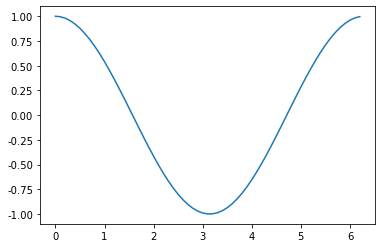

In [2]:
import numpy as np

x = np.arange(0, 2*np.pi, 0.1) # start, stop, step
y = np.cos(x)

print(x)

plt.plot(x, y)
plt.show()

사이킷런은 [코사인 유사도를 측정할 수 있는 도구](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html)를 제공하므로, 이를 이용해서 코사인 유사도를 계산해보기로 한다.

다음 예시에서는 앞에서 실습했던 NLTK 영화 리뷰 문서들에 대해 유사도를 측정해본다. 제대로 유사도가 계산되는지 확인하기 위해 먼저 유사도를 측정할 대상 문서를 만든다. 아래 예시에서는 첫째 리뷰의 뒷부분 절반을 잘라 대상 문서를 만들었다. 유사도 측정이 제대로 된다면 새로 만든 문서와 가장 유사한 문서로 첫째 리뷰가 나올 것이다. 코사인 유사도 계산을 위해서는 카운트 벡터가 필요하므로 새로 만든 문서에 대해서도 카운트 벡터로 변환하고 난 후에 cosine_similarity를 적용해 유사도를 계산한다.

이때, 사이킷런의 cosine_similarity 함수는 벡터 하나씩 유사도를 계산하지 않고 다수 벡터와 다수 벡터간의 유사도를 한 번에 계산하고 그 결과를 행렬로 변환한다. m개 벡터와 n개 벡터 간의 유사도를 한꺼번에 계산했다면 결과는 (m, n)의 2차원 행렬로 반환된다. 아래 예시에서는 대상 문서가 하나고 이를 전체 리뷰와 비교하므로 결과는 (1, 2000)의 행렬로 반환될 것이며, 이를 확인하는 코드가 추가되어 있다. 이와 같이 데이터가 어떤 형태로 생성되는지를 항상 확인할 필요가 있다. 결과가 행렬 형태로 반환되므로, 아래 예시에서 우리가 생성한 문서 - 첫째 리뷰의 뒤 절반에 대한 전체 리뷰의 유사도를 보고 싶으면 sim_result[0]을 보면 된다. 우리가 관심 있는 것은 유사도가 높은 것들이므로 결과를 아래와 같이 역순으로 정렬해서 본다.

In [3]:
from nltk.corpus import movie_reviews
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]


from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer("[\w']{3,}")
english_stops = set(stopwords.words('english'))

documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

tokens = [[token for token in tokenizer.tokenize(doc) if token not in english_stops] for doc in documents]

word_count = {}
for text in tokens:
    for word in text:
        word_count[word] = word_count.get(word, 0) + 1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)

word_features = sorted_features[:1000]


from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(vocabulary=word_features)
reviews_cv = cv.fit_transform(reviews)

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

# 첫째 리뷰의 문자수를 확인하고 뒤 절반을 가져오기 위해 중심점을 찾음
start = len(reviews[0]) // 2 
 # 중심점으로부터 뒤 절반을 가져와서 비교할 문서를 생성
source = reviews[0][-start:] 

# 코사인 유사도는 카운트 벡터에 대해 계산하므로 벡터로 변환
# transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력
source_cv = cv.transform([source]) 

# 행렬의 크기를 확인, 문서가 하나이므로 (1, 1000)
print("# 대상 특성 행렬의 크기:", source_cv.shape) 

# 변환된 count vector와 기존 값들과의 similarity 계산
sim_result = cosine_similarity(source_cv, reviews_cv) 

print("# 유사도 계산 행렬의 크기:", sim_result.shape)
print("# 유사도 계산결과를 역순으로 정렬:", sorted(sim_result[0], reverse=True)[:10])

#대상 특성 행렬의 크기: (1, 1000)
#유사도 계산 행렬의 크기: (1, 2000)
#유사도 계산결과를 역순으로 정렬: [0.8367205630128807, 0.43817531290756406, 0.4080451370075411, 0.40727044884302327, 0.4060219836225451, 0.3999621981759778, 0.39965783997760135, 0.39566661804603703, 0.3945302295079114, 0.3911637170821695]


위 결과를 보면 다른 것들에 비해 확실히 유사도가 높은 리뷰가 있다. 이것이 첫째 리뷰인지를 확인해야 하는데, numpy의 argmax 함수를 쓰면 아래와 같이 값이 가장 높은 항목의 index를 가져올 수 있다.

In [9]:
import numpy as np

print("# 가장 유사한 리뷰의 인덱스:", np.argmax(sim_result[0]))

# 가장 유사한 리뷰의 인덱스: 0


다행히도 원본과 일치하는 것을 볼 수 있다. 유사도가 가장 가까운 것들부터 인덱스를 순서대로 보고 싶다면, 다음과 같이 numpy의 argsort 함수를 쓰면 된다.

In [10]:
print("# 가장 유사한 리뷰부터 정렬한 인덱스:", (-sim_result[0].argsort()[:10]))

# 가장 유사한 리뷰부터 정렬한 인덱스: [-1640  -868  -857 -1061 -1277  -779 -1484  -671 -1471  -913]
